# Explainable AI


---


Prof. Dr. André Filipe M. Batista





# Importância de Variáveis

## Importação de bibliotecas básicas e Ajustes Iniciais

Instalação de pacotes adicionais

In [0]:
#@title Execute esta célula para instalar pacotes adicionais. 

!pip install dfply >> /dev/null
!pip install yellowbrick >> /dev/null


Pacotes instalados:

- dfply: facilitador para manipulação de dataframes. https://github.com/kieferk/dfply

- yellowbrick: visualização de modelos preditivos. https://www.scikit-yb.org/en/latest/


In [0]:
import numpy as np #biblioteca para processamento numerico em Python
import pandas as pd #biblioteca para processamento de dataframes em Python
import matplotlib.pyplot as plt #geracao de gráficos
import seaborn as sns #alternativa para a matplotlib para geracao de graficos

#informamos ao Python que estamos usando um notebook e que os graficos devem ser exibidos nele
%matplotlib inline
# configurações adicionais para os gráficos a serem gerados
from matplotlib import rc 
plt.rcParams["figure.figsize"] = [10,5]
# definimos o estilo dos gráficos
# veja mais estilos em https://matplotlib.org/3.1.1/gallery/#style-sheets
plt.style.use("fivethirtyeight") 
%config InlineBackend.figure_format = 'retina' #formato das imagens
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10}) #fonte utilizada
rc('mathtext',**{'default':'regular'})

# definimos a semente de aleatoriedade a ser utilizada
np.random.seed(42)

# vamos ignorar os warnings emitidos pelo Python
import warnings
warnings.filterwarnings("ignore")

# importamos os comandos da biblioteca dfply
from dfply import *

import operator  ### para ordenacao do zip

from sklearn.metrics import mean_squared_error, r2_score

# Machine Learning com Scikit-Learn

A proposta da biblioteca Scikit-Learn consiste em fornecer um conjunto de funcionalidades padronizadas, de modo a permitir que especialistas das mais diversas áreas possam construir modelos de Machine Learning.



Além de bem documentados, os modelos de ML implementados na biblioteca Scikit-Learn são padronizados quando ao input de dados e aos métodos disponíveis para a sua execução. Todos os modelos disponíveis na biblioteca aceitam entrada de dados na forma de arrays bidimensionais (observações x características).

site: https://scikit-learn.org

## Regressão

In [0]:
# importamos a funcionalidade de split do conjunto de dados em treino/teste
from sklearn.model_selection import train_test_split

### Importando o conjunto de dados como um Pandas DataFrame

In [0]:
# o conjunto de dados está no Google Drive, em um CSV separado por ;
banco = pd.read_csv('https://drive.google.com/uc?export=download&id=1y6ESHpXVMd15a5aiJ4hVs412vmZmk_EV', sep = ';')

In [0]:
banco.head()

cod_municipio  PopResid  ExpecVida  ...    Gini  CobBFamilia  traboutromun
0        1100015     24392      70.75  ...  0.5893    83.519997          2.30
1        1100023     90353      73.36  ...  0.5496    94.889999          3.93
2        1100031      6313      70.39  ...  0.5166    71.400002          3.48
3        1100049     78574      74.27  ...  0.5890    57.720001          2.57
4        1100056     17029      72.94  ...  0.5147    69.959999          5.44

[5 rows x 24 columns]

In [0]:
# verificando as caracteristicas básicas do conjunto de dados
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 24 columns):
cod_municipio            5565 non-null int64
PopResid                 5565 non-null int64
ExpecVida                5565 non-null float64
idoso                    5565 non-null float64
mulher                   5565 non-null float64
nascimentopercapta       5565 non-null float64
casado                   5565 non-null float64
evangelico               5565 non-null float64
deficiente               5565 non-null float64
densidadepop             5565 non-null float64
geladeira                5565 non-null float64
moradorfavela            5565 non-null float64
pavimentacao             5565 non-null float64
brancos                  5565 non-null float64
nvelsuperiorconcludo     5565 non-null float64
conclusoensinomdio       5565 non-null float64
ResideMenos10anos        5565 non-null float64
resideoutranacionalid    5565 non-null float64
taxadedesemprego         5565 non-null float64
taxa

In [0]:
# usamos os comandos mask e select da biblioteca dfply para filtrar o conjunto de dados
banco_filtrado = banco >> mask(X.PopResid > 10000) >> select(~X.PopResid)


# para evitarmos a exibição dos dados em notacao científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Separar conjunto de dados em treinamento e teste

In [0]:
# variavel de interesse
outcome = banco_filtrado >> select(X.ExpecVida)

# removemos a coluna ExpecVida do conjunto de dados (axis = 1 representa coluna. Inplace é para atualizar a variavel)
banco_filtrado.drop(['ExpecVida', 'cod_municipio' ], axis=1, inplace=True)

In [0]:
# fazemos a separação do conjunto de dados em treino/teste, com 30% dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(banco_filtrado, outcome, test_size=0.3)

In [0]:
X_train.shape #quantidade de registros para treino

(2136, 21)

In [0]:
X_test.shape #quantidade de registros para teste

(916, 21)

### Pré-processamento dos dados de treinamento


### Padronizar os dados de treino e teste

In [0]:
# importamos a funcao StandardScaler para padronizacao dos dados
from sklearn.preprocessing import StandardScaler

In [0]:
sc = StandardScaler()

In [0]:
# Obtemos as estatisticas necessarias para a padronizacao a partir do conjunto de treinamento
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [0]:
# padronizamos o conjunto de treinamento
X_train = pd.DataFrame(sc.transform(X_train), columns=X_train.columns)

In [0]:
# padronizamos o conjunto de teste
X_test = pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

## Algoritmos de Regressão


### 1. Regressão Simples

In [0]:
# importamos o modelo de regressão linear
from sklearn.linear_model import LinearRegression
# importamos as metricas de avaliacao
from sklearn.metrics import r2_score, mean_squared_error
import operator  ### para ordenacao do zip

### instanciamos o modelo de regressao linear
lr = LinearRegression()

In [0]:
# ajustamos o modelo aos dados de treinamento
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
### avaliamos o desempenho do modelo

pred_train_lr= lr.predict(X_train)
print('RMSE (treino):', np.sqrt(mean_squared_error(y_train,pred_train_lr)))
print('R^2 (treino):', r2_score(y_train, pred_train_lr))

pred_test_lr= lr.predict(X_test)
print('RMSE (teste):',np.sqrt(mean_squared_error(y_test,pred_test_lr))) 
print('R^2 (teste):', r2_score(y_test, pred_test_lr))

RMSE (treino): 1.4604923330002504
R^2 (treino): 0.725510160532077
RMSE (teste): 1.4430575194808577
R^2 (teste): 0.7253642096022483


#### 2. Árvores de Decisão

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
dt = DecisionTreeRegressor(random_state=42, max_depth=3)

In [0]:
dt.fit(X_train, y_train)
pred_train_dt= dt.predict(X_train)
print('RMSE (treino):', np.sqrt(mean_squared_error(y_train,pred_train_dt)))
print('R^2 (treino):', r2_score(y_train, pred_train_dt))

pred_test_dt= dt.predict(X_test)
print('RMSE (teste):',np.sqrt(mean_squared_error(y_test,pred_test_dt))) 
print('R^2 (teste):', r2_score(y_test, pred_test_dt))

RMSE (treino): 1.5046927249761428
R^2 (treino): 0.7086444114818248
RMSE (teste): 1.5560790776740225
R^2 (teste): 0.6806601064935061


### Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
rf = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=30,
                      max_features='sqrt', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=2000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)


In [0]:
rf.fit(X_train, y_train)
pred_train_rf= rf.predict(X_train)
print('RMSE (treino):', np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print('R^2 (treino):', r2_score(y_train, pred_train_rf))

pred_test_rf= rf.predict(X_test)
print('RMSE (teste):',np.sqrt(mean_squared_error(y_test,pred_test_rf))) 
print('R^2 (teste):', r2_score(y_test, pred_test_rf))

RMSE (treino): 0.00014557762841214524
R^2 (treino): 0.9999999972728
RMSE (teste): 1.2821754602104298
R^2 (teste): 0.7831872737210206


## Importância de Variáveis com LIME




In [0]:
### i irá armazenar a instância que queremos compreender
i = 21

In [0]:
# instalação
!pip install lime >> /dev/null

In [0]:
import lime
import lime.lime_tabular

In [0]:
X_train.columns

Index(['idoso', 'mulher', 'nascimentopercapta', 'casado', 'evangelico',
       'deficiente', 'densidadepop', 'geladeira', 'moradorfavela',
       'pavimentacao', 'brancos', 'nvelsuperiorconcludo', 'conclusoensinomdio',
       'ResideMenos10anos', 'resideoutranacionalid', 'taxadedesemprego',
       'taxatrabinfantil', 'horastrabalho', 'Gini', 'CobBFamilia',
       'traboutromun'],
      dtype='object')

In [0]:
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.values,
                                                   feature_names=X_train.columns, 
                                                   categorical_features=[],
                                                   verbose=True, 
                                                   mode='regression')

### LIME para Regressão Linear

In [0]:
exp = explainer.explain_instance(X_test.loc[i], lr.predict)

Intercept 72.20987440016427
Prediction_local [75.76773273]
Right: 75.03006147575579


In [0]:
exp.show_in_notebook(show_table=True)

### LIME para Árvore de Decisão

In [0]:
exp = explainer.explain_instance(X_test.loc[i], dt.predict)

Intercept 72.22689930664842
Prediction_local [75.87406315]
Right: 75.90835266821345


In [0]:
exp.show_in_notebook(show_table=True)

### LIME para Random Forest

In [0]:
exp = explainer.explain_instance(X_test.loc[i], rf.predict)

Intercept 72.42656630100254
Prediction_local [75.71263264]
Right: 75.18784499999995


In [0]:
exp.show_in_notebook(show_table=True)

## Importância de Variáveis com SHAP

In [0]:
!pip install shap >> /dev/null

In [0]:
import shap

### SHAP para Regressão Linear

In [0]:
# Shap para Regressão Linear
explainer = shap.KernelExplainer(lr.predict, X_test )
shap_values = explainer.shap_values(X_test)

Using 916 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


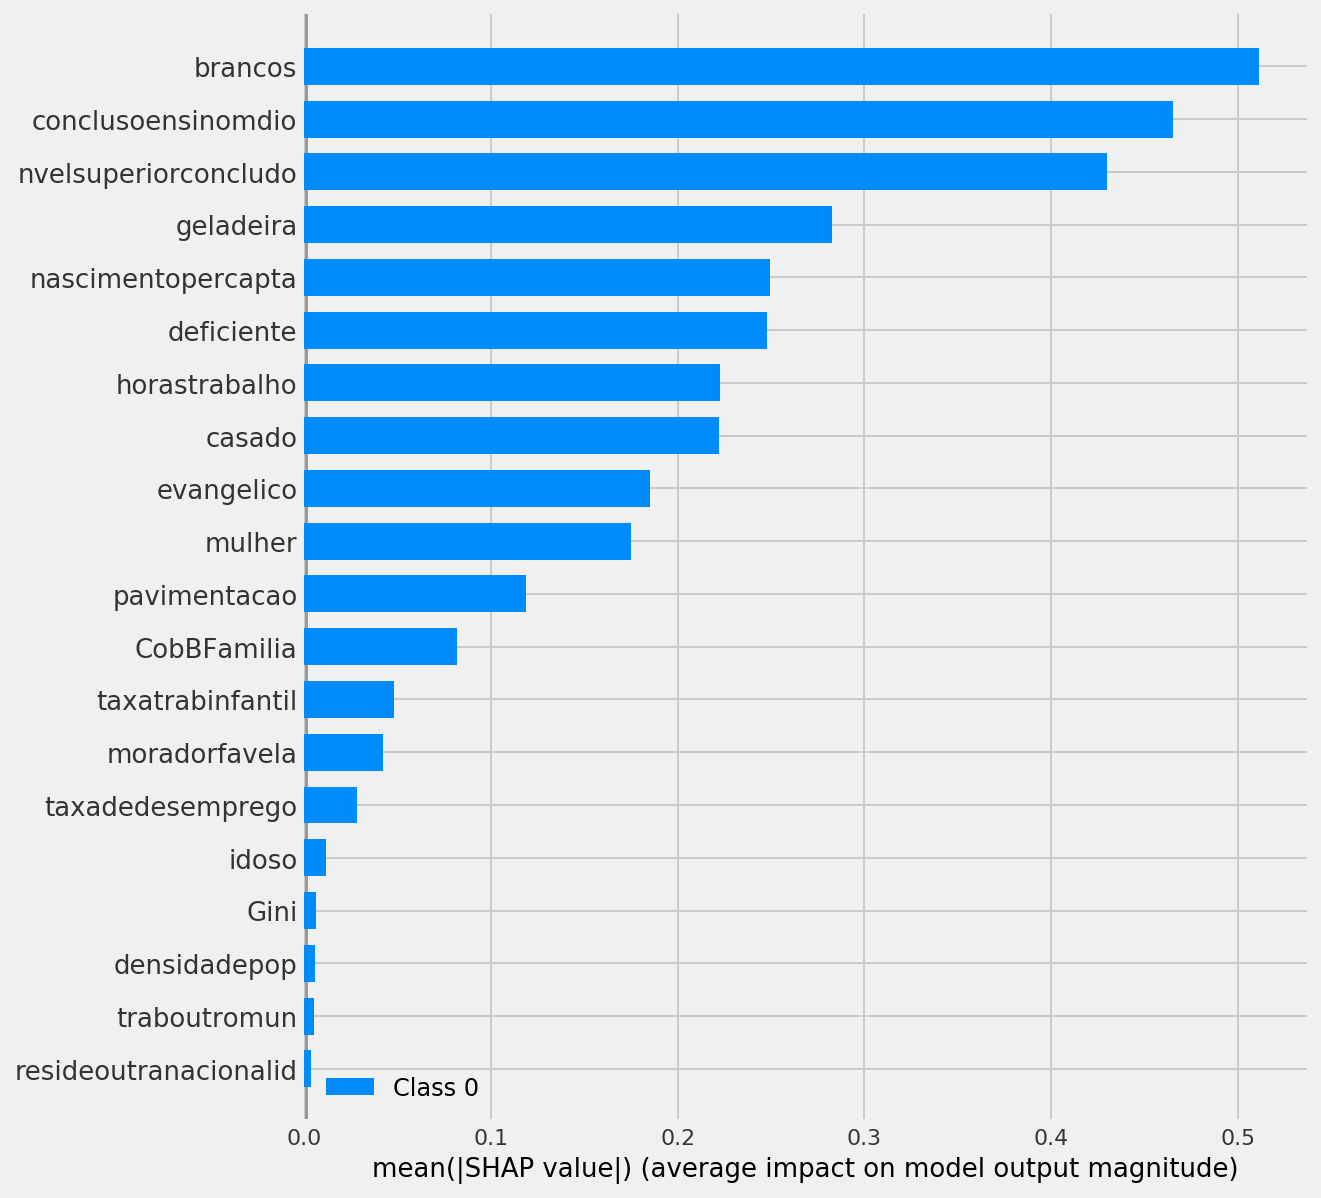

In [0]:
shap.summary_plot(shap_values, X_test)

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value[0], shap_values[0][i,:], X_test.iloc[i,:], link="logit")

### SHAP para Árvore de Decisão

In [0]:
# Shap para Árvore de Decisão
explainer = shap.TreeExplainer(dt)
shap_values = explainer.shap_values(X_test)

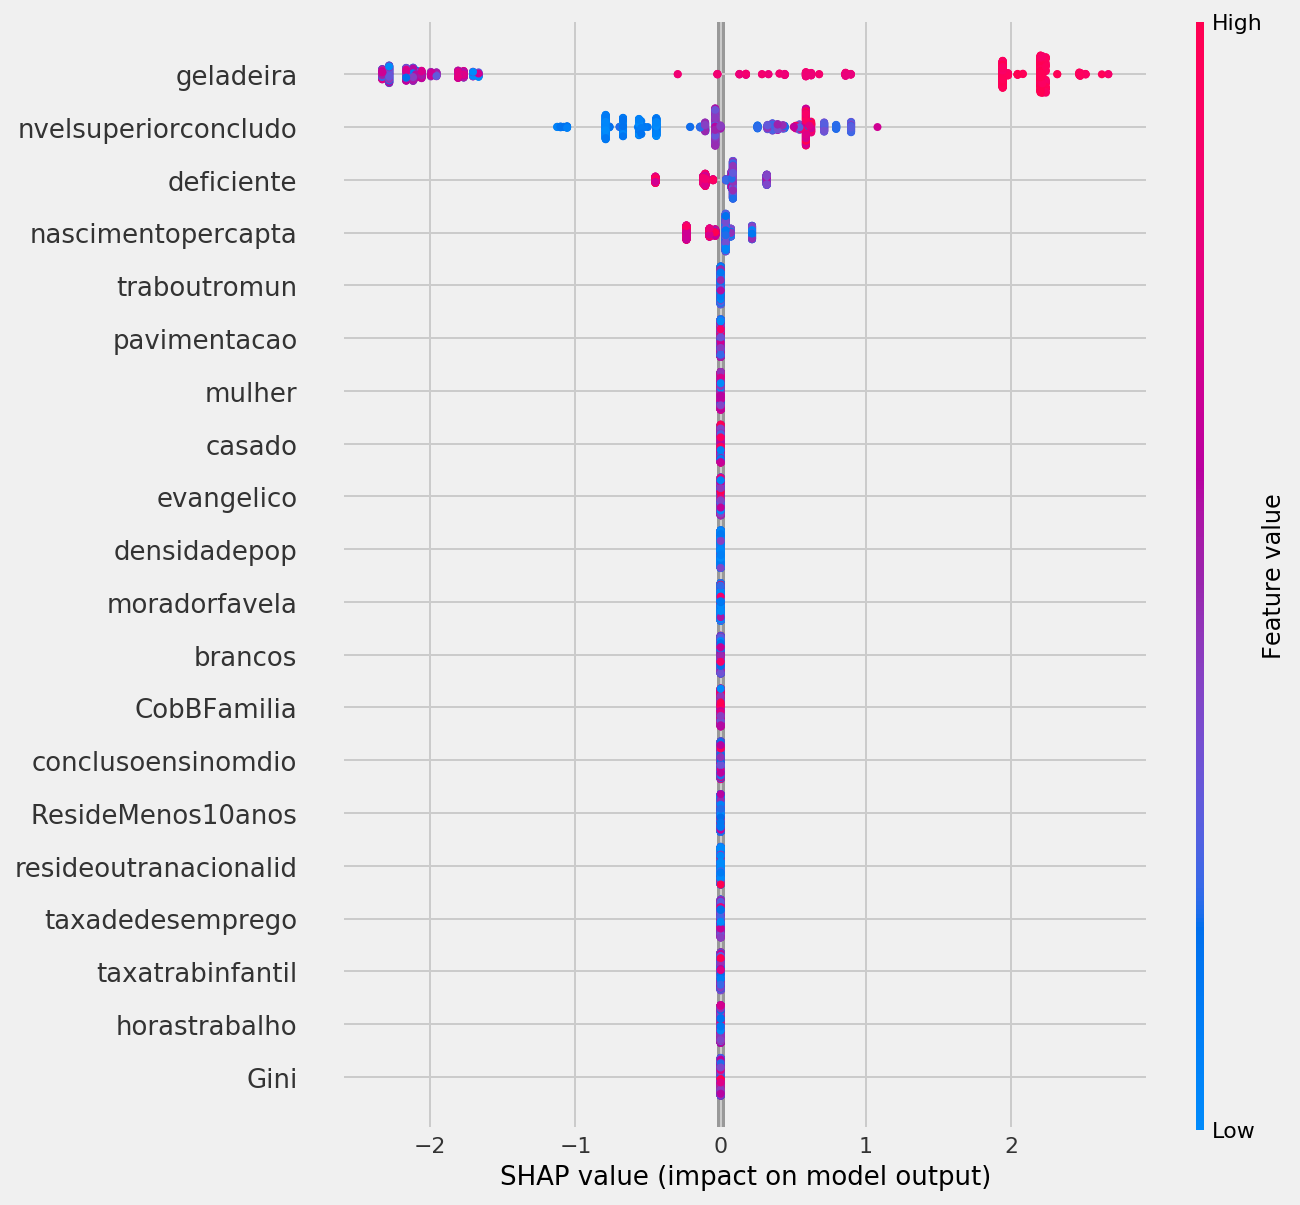

In [0]:
shap.summary_plot(shap_values, X_test)

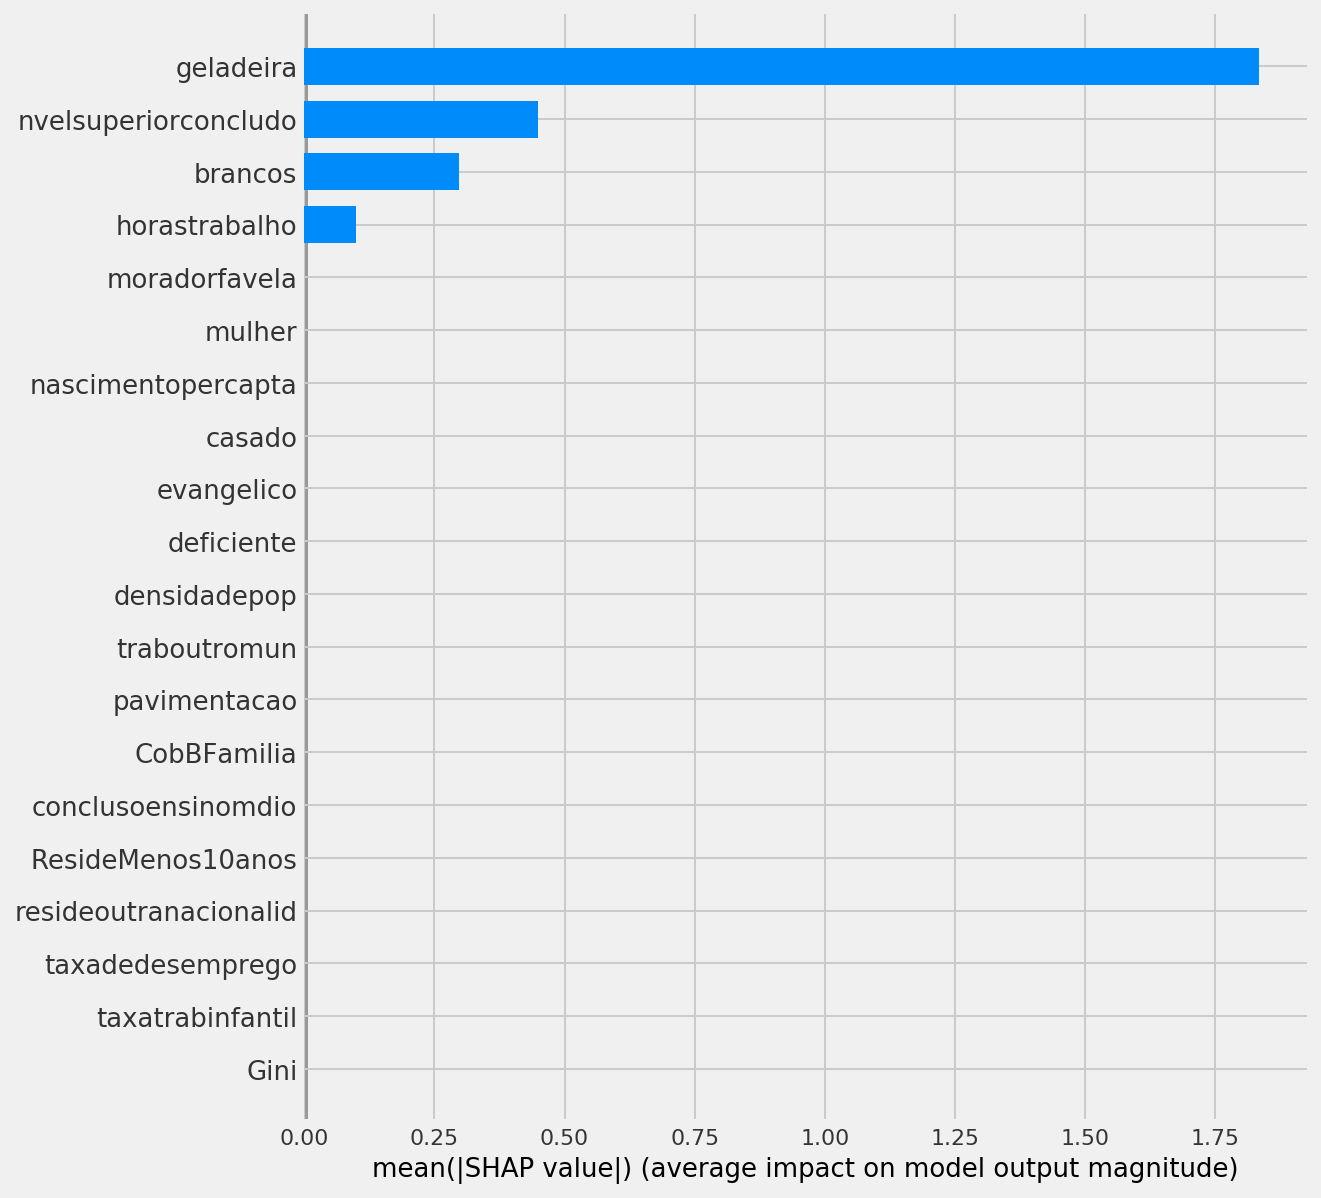

In [0]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.loc[i],show=False)

### SHAP para Random Forest

In [0]:
# Shap para RF
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

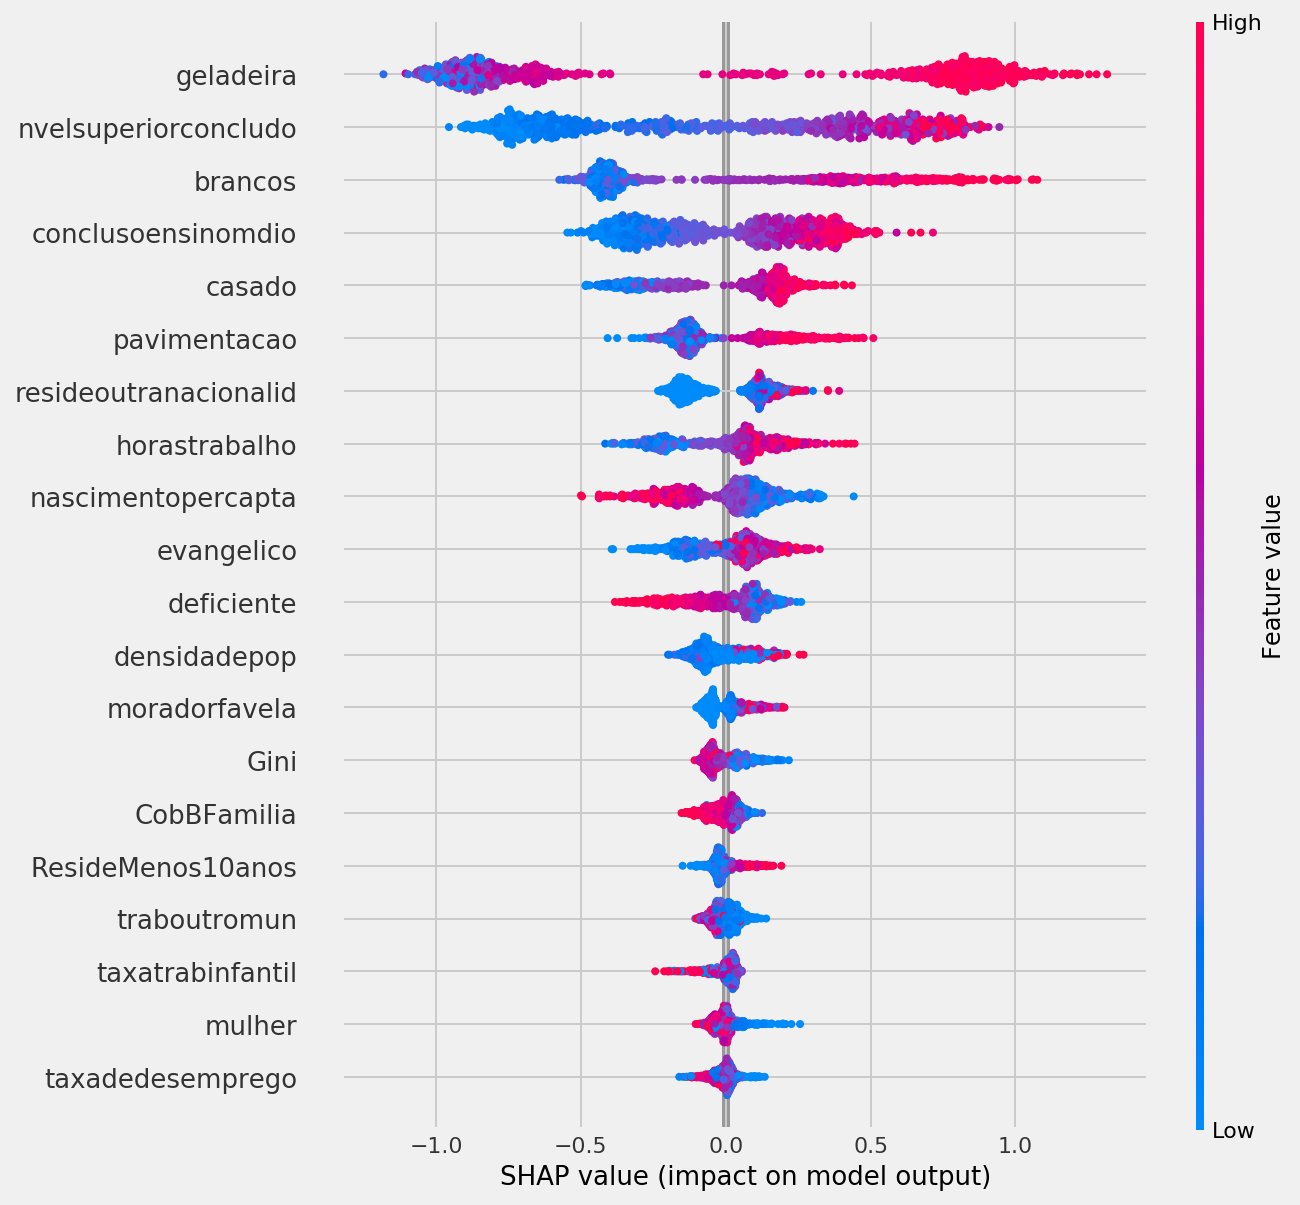

In [0]:
shap.summary_plot(shap_values, X_test)

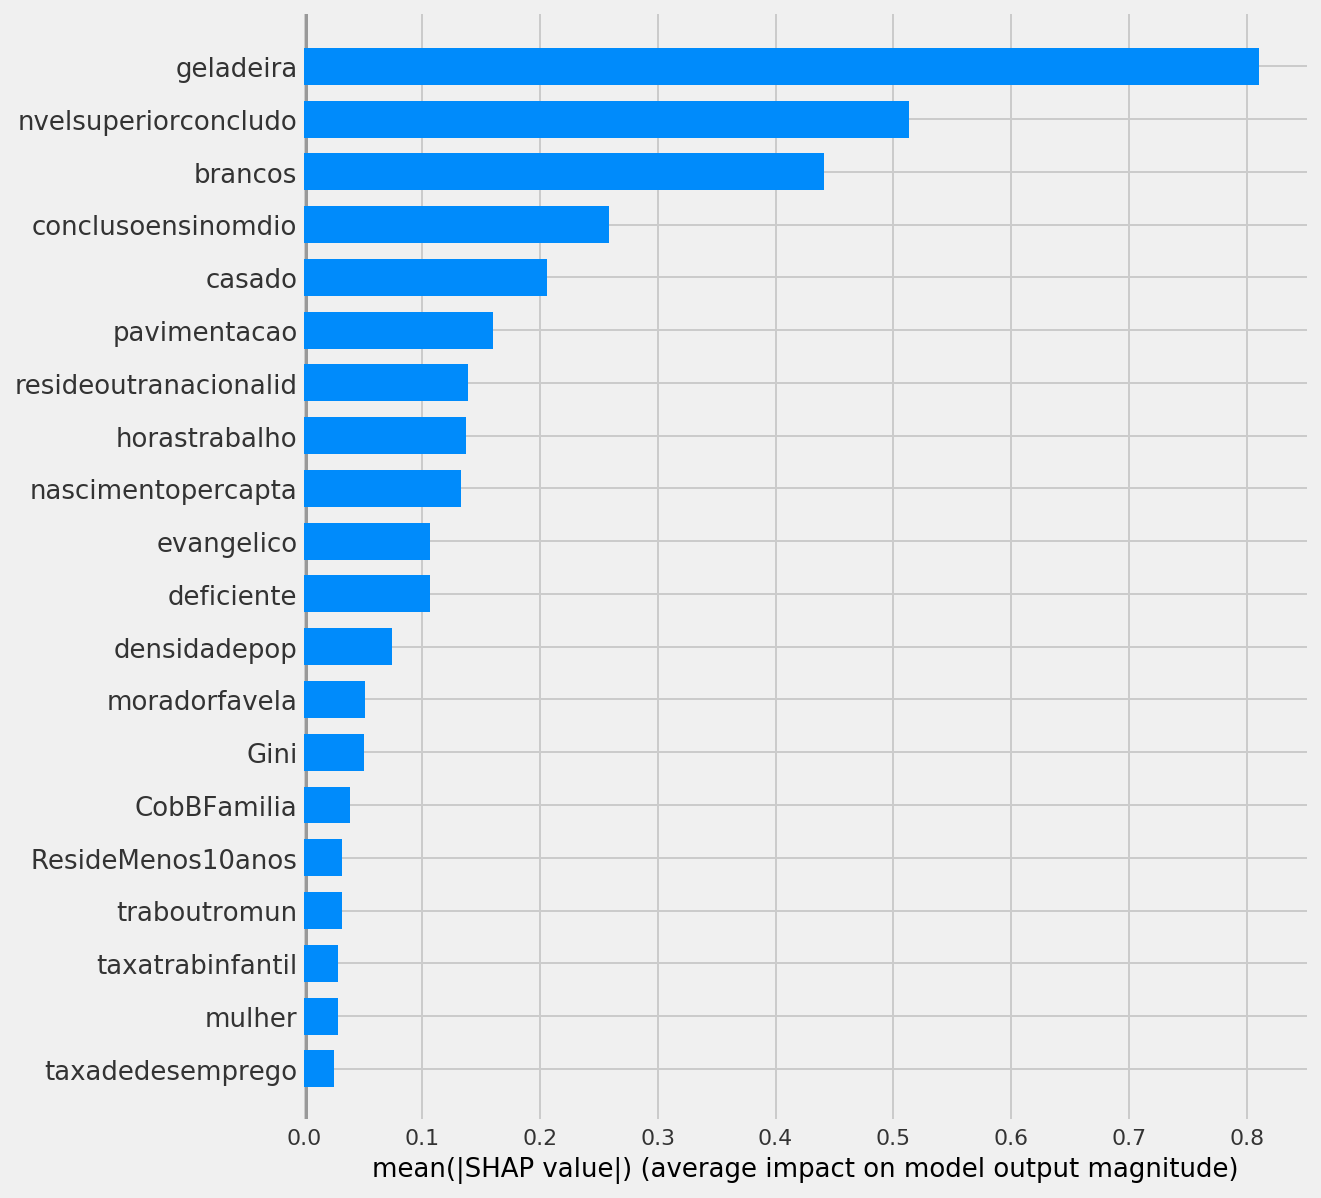

In [0]:
shap.summary_plot(shap_values, X_test, plot_type='bar')

In [0]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[i,:], X_test.loc[i],show=False)

NameError: ignored

# ELI5

In [0]:
# instalação
!pip install eli5 >> /dev/null

### ELI5 Regressão Linear

In [0]:
import eli5
from eli5.sklearn import PermutationImportance

### Importância das variáveis da regressao linear
perm = PermutationImportance(lr).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X_train.columns))

Using TensorFlow backend.


### ELI5 Árvore de Decisão

In [0]:
### Importância das variáveis da arvore de decisao
perm = PermutationImportance(dt).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X_train.columns))

### ELI5 Random Forest

In [0]:
### Importância das variáveis da arvore de decisao
perm = PermutationImportance(rf).fit(X_test, y_test)
eli5.show_weights(perm, feature_names=list(X_train.columns))